In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# For plotting inline
%matplotlib inline
plt.ion()

In [2]:
# Import suftware (use development copy)
import sys
sys.path.append('../../suftware')

import suftware as sw

In [3]:
# Set default plotting style
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rc('text', usetex=True)
fontsize=9
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['hatch.linewidth'] = 1
mpl.rcParams['hatch.color'] = 'black'

In [4]:
# Define Q_true using built-in example Gaussian mixture density
Q_true_density = sw.SimulatedDensity('DoubleGaussian')

# Generate data
N = 30
seed = 0
data = Q_true_density.sample(num_samples=N, seed=seed)

# Show the dataset
print('Simulated dataset: \n', data)

Simulated dataset: 
 [-1.0755  0.9585 -0.7035 -1.0965 -1.6545 -0.2235 -1.5975  2.4555  3.2325
 -1.8105  1.6815 -1.1835 -0.9585  2.7615 -3.2445 -3.1245 -3.8745  1.9935
  1.5735  2.2785  3.5205  1.7415 -1.4985  1.5915 -2.9265 -0.3075 -2.7885
  2.9715 -1.2195 -1.6905]


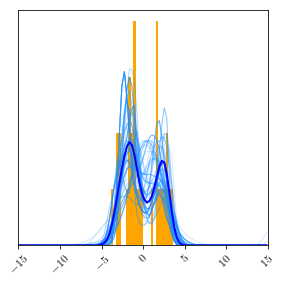

In [5]:
# Estiamte density
G = 100
bbox = Q_true_density.bounding_box
seed = 0
num_samples = 100
density = sw.DensityEstimator(data, 
                              bounding_box=bbox, 
                              num_grid_points=G, 
                              seed=seed,
                              num_posterior_samples=num_samples)

# Display estimate using built-in plotting function
density.plot()

In [6]:
# Get grid
xs = density.grid
h = density.grid_spacing

# Compute Q_true at gridpoints
Q_true = Q_true_density(xs)

# Histogram
R = density.histogram

# MAP density
Q_star = density.evaluate(xs)

# Laplace samples
Q_samples = density.evaluate_samples(xs,resample=False)

# Resampled samples
Q_samples_weighted = density.evaluate_samples(xs,resample=True)

In [7]:
# Comptue entropies
eps = 1E-10 # to avoid log2(0) problems

# H_true
H_true = np.sum(-h*Q_true*np.log2(Q_true+eps))

# H_hist
H_hist = np.sum(-h*R*np.log2(R+eps))

# H_star
H_star = np.sum(-h*Q_star*np.log2(Q_star+eps))

# H_lap
Hs_lap=np.sum(-h*Q_samples*np.log2(Q_samples+eps),axis=0)

# H_imp
Hs_imp=np.sum(-h*Q_samples_weighted*np.log2(Q_samples_weighted + eps),axis=0)

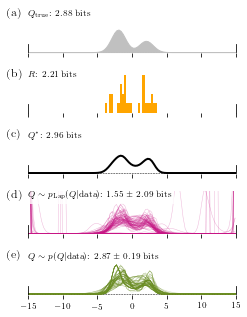

In [8]:
# Layout figure and panels therein
figsize = [3.4,4.5]
gridspec_kw={'left':.1, 'right':.95, 
             'top':.98, 'bottom':.1, 
             'hspace':.4}
fig, axs = plt.subplots(5,1, figsize=figsize, sharex=True, gridspec_kw=gridspec_kw)

# Set plot syling parameters
ylim=[-0.01,.5]
xlim=bbox
text_x = -15
text_y = .4
ybound = .1
panel_x = -18

for panel_num, ax in enumerate(axs):
    
    # Select panel
    panel_label = 'abcde'[panel_num]
    
    # Panel (a): Q_true
    if panel_label == 'a':
        ax.fill_between(xs, Q_true, color='silver', alpha=1, label='$Q_\mathrm{true}$')
        text = '$Q_\mathrm{true}$: %0.2f bits'%(H_true)
    
    # Panel (b): R 
    elif panel_label == 'b':
        ax.bar(xs,R,facecolor='orange', width=h, alpha=1, label='$R$')
        text = '$R$: %0.2f bits'%(H_hist)
        
    # Panel (c): Q_star
    elif panel_label == 'c':
        ax.plot(xs,Q_star, color='black', linewidth=2, alpha=1)
        text = '$Q^*$: %0.2f bits'%(H_star)
        
    # Panel (d): Q_samples (Laplace)
    elif panel_label == 'd':
        ax.plot(xs,Q_samples, color='mediumvioletred', linewidth=.5, alpha=.3)
        text = '$Q \sim p_\mathrm{Lap}(Q | \mathrm{data})$: %0.2f $\pm$ %0.2f bits'%(np.mean(Hs_lap), np.std(Hs_lap))

    # Panel (e): Q_samples_weighted (Resampled)
    elif panel_label == 'e':
        ax.plot(xs,Q_samples_weighted, color='olivedrab', linewidth=.5, alpha=.3)
        text = '$Q \sim p(Q | \mathrm{data})$: %0.2f $\pm$ %0.2f bits'%(np.mean(Hs_imp), np.std(Hs_imp))

        
    # Display entorpy values over translucent white rectangle
    t = ax.text(x=text_x, y=text_y, s=text, horizontalalignment='left', verticalalignment='bottom')
    t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Display panel label
    ax.text(x=panel_x, y=text_y, s='(%s)'%panel_label, fontsize=12, horizontalalignment='left', verticalalignment='bottom')
    
    # Style plots
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False) 
    ax.spines['bottom'].set_visible(False) 
    ax.spines['right'].set_bounds(0,ybound) 
    ax.spines['left'].set_bounds(0,ybound) 
    ax.axhline(0,linestyle='--',color='k',linewidth=.5, zorder=-100)

# Save figure
fig.savefig('figures/fig_1.pdf')